### Importamos las librerias


In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import math as mt
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder 
from numpy.core.umath_tests import inner1d

### Cargamos los datos preprocesados, lo procesamos y los Visualizamos

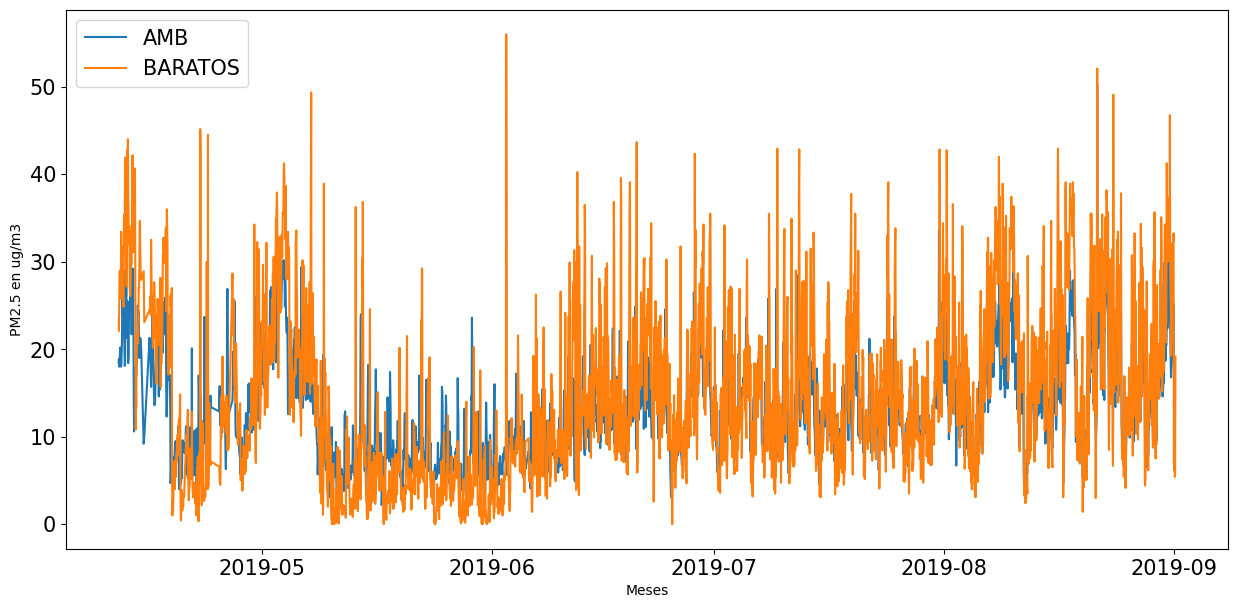

la distancia entre las mediciones es:  639.125957230944


In [150]:
data = pd.read_excel('Datos AMB.xlsx')
data1 = pd.read_csv('Datos Baratos.csv',sep=",",parse_dates=['fecha_hora_med'])
DataAMB_CORREGIDO = pd.read_excel('Datos AMB2.xlsx')
DataAMB_CORREGIDO['Baratas'] = data1['valor']

# Limpieza de datos
data1 = data1.drop(['id_parametro'], axis =1)
data['Medidas'] = data['Medidas'].replace('NoData', '')
data = data.dropna()
data1 = data1.dropna()

# Sincronizacion de fechas

data1['fecha_hora_med']     = pd.to_datetime(data1['fecha_hora_med'])
data['Fechas']              = pd.to_datetime(data['Fechas'])
DataAMB_CORREGIDO['Fechas'] = pd.to_datetime(DataAMB_CORREGIDO['Fechas'])
data1 = data1.sort_values('fecha_hora_med',ascending=True)

data = data.drop_duplicates()
data1 = data1.drop_duplicates()


# Plot

plt.figure(figsize=(15,7))

DATOS_AMB = plt.plot(DataAMB_CORREGIDO['Fechas'], DataAMB_CORREGIDO['Medidas'], label='AMB')
DATOS_BAJA_CALIDAD = plt.plot(data1['fecha_hora_med'], data1['valor'], label='BARATOS')
plt.xlabel('Meses')
plt.ylabel('PM2.5 en ug/m3')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# funcion distancia euclidiana
def distancia_euclidiana(ref,exp):
    d = (data[ref]-DataAMB_CORREGIDO[exp])**2
    distance = np.sqrt(d.sum())
    return distance

def distancia_euclidiana_c(exp,pred):
    d = (DataAMB_CORREGIDO[exp] - DataAMB_CORREGIDO[pred])**2
    distance = np.sqrt(d.sum())
    return distance

print('la distancia entre las mediciones es: ',distancia_euclidiana('Medidas','Baratas'))


# Promedio movil con varios tipos de configuraciones

Distancia de los promedios moviles con una ventana de 3 es de:  353.71823994620985
Distancia de los promedios moviles con una ventana de 9 es de:  309.05488955073326
Distancia de los promedios moviles con una ventana de 16 es de:  285.0984453673163
Distancia de los promedios moviles con una ventana de 24 es de:  266.30390817299326
Distancia de los promedios moviles con una ventana de 33 es de:  248.93327744691777
Distancia de los promedios moviles con una ventana de 46 es de:  227.36321918834633
Distancia de los promedios moviles con una ventana de 60 es de:  207.5156496625896
Distancia de los promedios moviles con una ventana de 80 es de:  184.17817899458322
Distancia de los promedios moviles con una ventana de 100 es de:  165.55856800437573
Distancia de los promedios moviles con una ventana de 120 es de:  150.51320367029504
Distancia de los promedios moviles con una ventana de 150 es de:  132.81469003611636


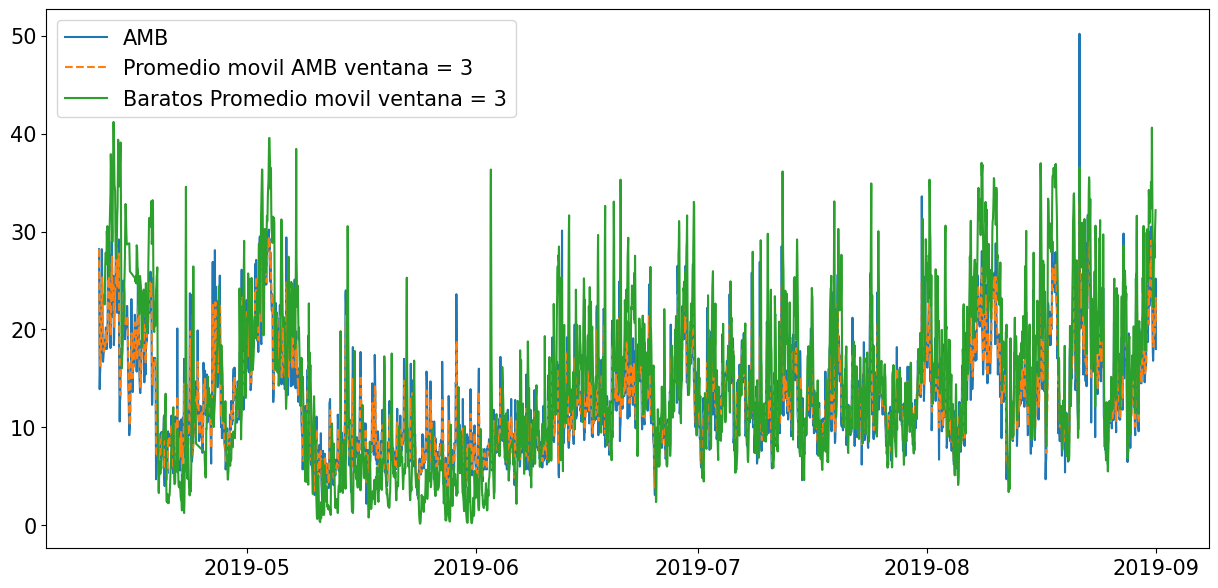

,Fechas,Medidas,Baratas,moving average_3,moving average_9,moving average_16,moving average_24,moving average_33,moving average_46,moving average_60,moving average_80,moving average_100,moving average_120,moving average_150,pred,moving average_3_b
0,2019-04-11 17:00:00,18.5,29.666668,18.500000,18.500000,18.500000,18.500000,18.500000,18.500000,18.500000,18.500000,18.500000,18.500000,18.500000,14.324495,29.666668
1,2019-04-11 18:00:00,18.9,22.833334,18.766667,18.722222,18.712500,18.708333,18.706061,18.704348,18.703333,18.702500,18.702000,18.701667,18.701333,19.216229,25.111112
2,2019-04-11 19:00:00,18.0,20.250000,18.328571,18.426230,18.444733,18.452285,18.456304,18.459285,18.461031,18.462455,18.463305,18.463869,18.464432,16.294409,22.333334
3,2019-04-11 20:00:00,18.4,22.249998,18.366667,18.417344,18.431372,18.437536,18.440923,18.443483,18.445002,18.446251,18.447000,18.447500,18.448000,23.510263,22.288888
4,2019-04-11 21:00:00,19.3,23.166670,18.848387,18.679914,18.651056,18.639922,18.634175,18.629999,18.627589,18.625644,18.624492,18.623731,18.622974,10.793479,22.741937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,2019-08-31 19:00:00,20.4,15.416666,20.621228,20.905885,21.526694,21.601410,21.293976,20.651008,19.974858,19.186062,18.603703,18.179190,17.739964,13.016823,15.692311
3323,2019-08-31 20:00:00,18.7,36.583332,19.660614,20.464708,21.194142,21.369298,21.141389,20.567987,19.933060,19.174061,18.605610,18.187798,17.752680,17.646368,26.137822
3324,2019-08-31 21:00:00,22.8,13.583333,21.230307,20.931766,21.383066,21.483754,21.238955,20.662966,20.027058,19.263590,18.688667,18.264033,17.819532,15.583177,19.860577
3325,2019-08-31 22:00:00,25.2,19.333334,23.215153,21.785413,21.832117,21.781054,21.471957,20.856031,20.196662,19.410168,18.817604,18.378677,17.917286,20.561228,19.596956


In [154]:
### color = ['limegreen', '#bc15b0', 'indigo']
linestyle = ['-','--','-.']
plt.figure(figsize=(15,7))

#Promedio movil con la ventana = 3 y con el paso = 1 y su distancia 

data1['moving average_3'] = data1['valor'].ewm(span = 3).mean()
data['moving average_3'] = data['Medidas'].ewm(span = 3).mean()
DataAMB_CORREGIDO['moving average_3'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 3).mean()
DataAMB_CORREGIDO['moving average_3_b'] = DataAMB_CORREGIDO['Baratas'].ewm(span = 3).mean()
print('Distancia de los promedios moviles con una ventana de 3 es de: ',distancia_euclidiana('moving average_3','moving average_3'))


#Promedio movil con la ventana = 9 y con el paso = 1 y su distancia 

data1['moving average_9'] = data1['valor'].ewm(span = 9).mean()
data['moving average_9'] = data['Medidas'].ewm(span = 9).mean()
DataAMB_CORREGIDO['moving average_9'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 9).mean()
print('Distancia de los promedios moviles con una ventana de 9 es de: ',distancia_euclidiana('moving average_9','moving average_9'))

#Promedio movil con la ventana = 16 y con el paso = 1 y su distancia 

data1['moving average_16'] = data1['valor'].ewm(span = 16).mean()
data['moving average_16'] = data['Medidas'].ewm(span = 16).mean()
DataAMB_CORREGIDO['moving average_16'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 16).mean()
print('Distancia de los promedios moviles con una ventana de 16 es de: ',distancia_euclidiana('moving average_16','moving average_16'))

#Promedio movil con la ventana = 24 y con el paso = 1 y su distancia 

data1['moving average_24'] = data1['valor'].ewm(span = 24).mean()
data['moving average_24'] = data['Medidas'].ewm(span = 24).mean()
DataAMB_CORREGIDO['moving average_24'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 24).mean()
print('Distancia de los promedios moviles con una ventana de 24 es de: ',distancia_euclidiana('moving average_24','moving average_24'))

#Promedio movil con la ventana = 33 y con el paso = 1 y su distancia 

data1['moving average_33'] = data1['valor'].ewm(span = 33).mean()
data['moving average_33'] = data['Medidas'].ewm(span = 33).mean()
DataAMB_CORREGIDO['moving average_33'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 33).mean()
print('Distancia de los promedios moviles con una ventana de 33 es de: ',distancia_euclidiana('moving average_33','moving average_33'))

#Promedio movil con la ventana = 46 y con el paso = 1 y su distancia 

data1['moving average_46'] = data1['valor'].ewm(span = 46).mean()
data['moving average_46'] = data['Medidas'].ewm(span = 46).mean()
DataAMB_CORREGIDO['moving average_46'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 46).mean()
print('Distancia de los promedios moviles con una ventana de 46 es de: ',distancia_euclidiana('moving average_46','moving average_46'))

#Promedio movil con la ventana = 60 y con el paso = 1 y su distancia 

data1['moving average_60'] = data1['valor'].ewm(span = 60).mean()
data['moving average_60'] = data['Medidas'].ewm(span = 60).mean()
DataAMB_CORREGIDO['moving average_60'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 60).mean()
print('Distancia de los promedios moviles con una ventana de 60 es de: ',distancia_euclidiana('moving average_60','moving average_60'))

#Promedio movil con la ventana = 80 y con el paso = 1 y su distancia 

data1['moving average_80'] = data1['valor'].ewm(span = 80).mean()
data['moving average_80'] = data['Medidas'].ewm(span = 80).mean()
DataAMB_CORREGIDO['moving average_80'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 80).mean()
print('Distancia de los promedios moviles con una ventana de 80 es de: ',distancia_euclidiana('moving average_80','moving average_80'))

#Promedio movil con la ventana = 100 y con el paso = 1 y su distancia 

data1['moving average_100'] = data1['valor'].ewm(span = 100).mean()
data['moving average_100'] = data['Medidas'].ewm(span = 100).mean()
DataAMB_CORREGIDO['moving average_100'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 100).mean()
print('Distancia de los promedios moviles con una ventana de 100 es de: ',distancia_euclidiana('moving average_100','moving average_100'))

#Promedio movil con la ventana = 120 y con el paso = 1 y su distancia 

data1['moving average_120'] = data1['valor'].ewm(span = 120).mean()
data['moving average_120'] = data['Medidas'].ewm(span = 120).mean()
DataAMB_CORREGIDO['moving average_120'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 120).mean()
print('Distancia de los promedios moviles con una ventana de 120 es de: ',distancia_euclidiana('moving average_120','moving average_120'))

#Promedio movil con la ventana = 150 y con el paso = 1 y su distancia 

data1['moving average_150'] = data1['valor'].ewm(span = 150).mean()
data['moving average_150'] = data['Medidas'].ewm(span = 150).mean()
DataAMB_CORREGIDO['moving average_150'] = DataAMB_CORREGIDO['Medidas'].ewm(span = 150).mean()
print('Distancia de los promedios moviles con una ventana de 150 es de: ',distancia_euclidiana('moving average_150','moving average_150'))


plt.plot(data['Fechas'], data['Medidas'], label='AMB')
PROMEDIO_MOVIL = plt.plot(data['Fechas'], data['moving average_3'], '--',label='Promedio movil AMB ventana = 3')
plt.plot(data1['fecha_hora_med'], data1['moving average_3'], label='Baratos Promedio movil ventana = 3')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
DataAMB_CORREGIDO

# Prediccion y calibracion de las medidas para ventana = 3

Mean Absolute Error: 5.111007285997467
Accuracy: 29.1248682282487
RMSE: 6.71631005562945


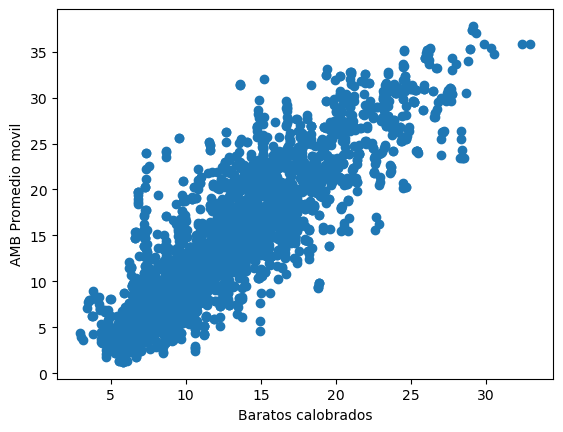

El error cuadraticomedio de los calibrados con AMB es de:  22.432459058370878
Distancia de los calibrados con AMB es de:  251.715610011227


In [178]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_3'].values
X = DataAMB_CORREGIDO['moving average_3'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf3=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf3.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf3.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)



plt.scatter(DataAMB_CORREGIDO['moving average_3'], rf3.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred3'] = rf3.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf3.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_3','pred3'))

# Prediccion y calibracion de las medidas para ventana = 9

Mean Absolute Error: 3.3013496126317037
Accuracy: 64.59494935883032
RMSE: 4.268368751915016


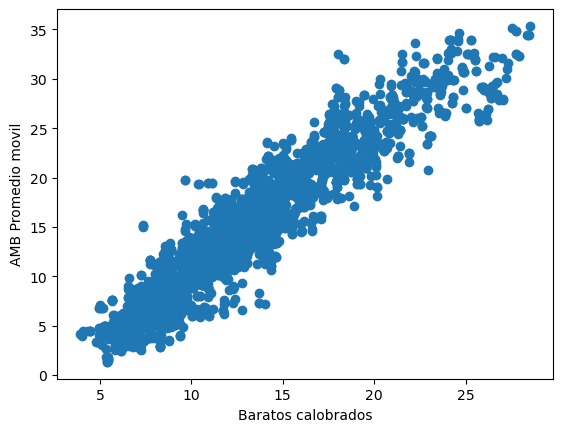

El error cuadraticomedio de los calibrados con AMB es de:  21.58893220803095
Distancia de los calibrados con AMB es de:  207.41239461939028


In [177]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_9'].values
X = DataAMB_CORREGIDO['moving average_9'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf9=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf9.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf9.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_9'], rf9.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred9'] = rf9.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf9.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_9','pred9'))

# Prediccion y calibracion de las medidas para ventana = 16

Mean Absolute Error: 2.482460391071585
Accuracy: 76.67603924328661
RMSE: 3.207961962728302


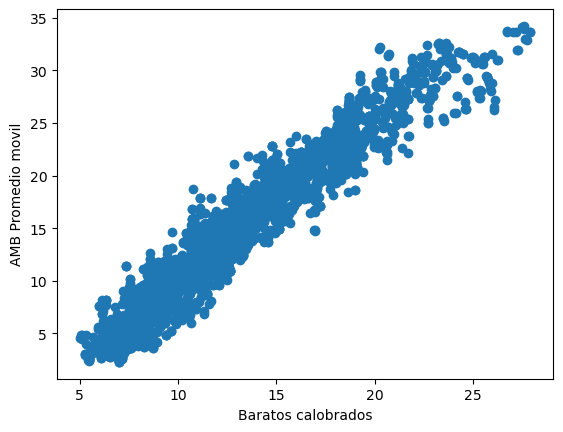

El error cuadraticomedio de los calibrados con AMB es de:  22.90900114121408
Distancia de los calibrados con AMB es de:  197.80063389961964


In [176]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_16'].values
X = DataAMB_CORREGIDO['moving average_16'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf16=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf16.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf16.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)



plt.scatter(DataAMB_CORREGIDO['moving average_16'], rf16.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred16'] = rf16.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf16.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_16','pred16'))


# Prediccion y calibracion de las medidas para ventana = 24

Mean Absolute Error: 2.142222567582293
Accuracy: 80.41194060921814
RMSE: 2.758255920027242


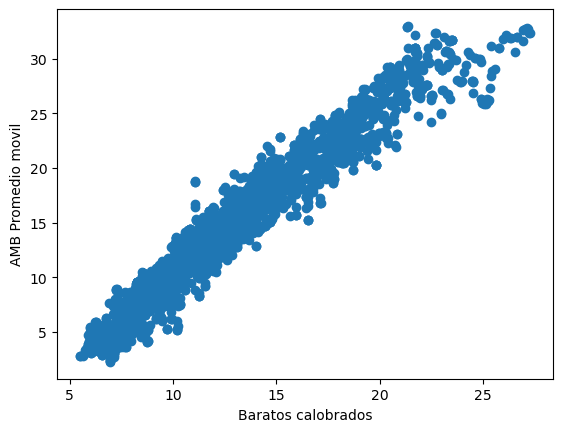

El error cuadraticomedio de los calibrados con AMB es de:  23.58363509456447
Distancia de los calibrados con AMB es de:  192.8314043098085


In [175]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_24'].values
X = DataAMB_CORREGIDO['moving average_24'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf24=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf24.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf24.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_24'], rf24.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred24'] = rf24.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf24.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_24','pred24'))

# Prediccion y calibracion de las medidas para ventana = 33

Mean Absolute Error: 1.9334986465801633
Accuracy: 83.31767823076834
RMSE: 2.5043081497135997


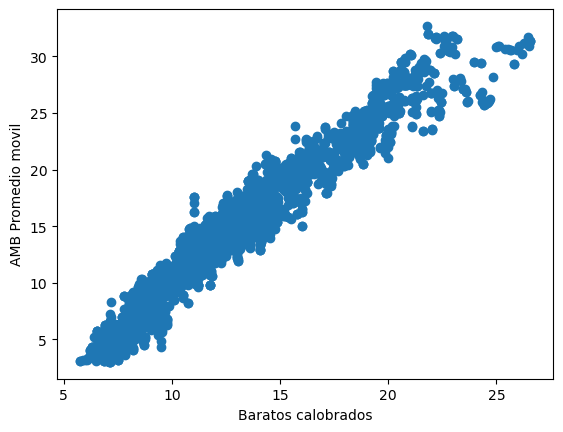

El error cuadraticomedio de los calibrados con AMB es de:  24.155825672718425
Distancia de los calibrados con AMB es de:  188.30273046525963


In [174]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_33'].values
X = DataAMB_CORREGIDO['moving average_33'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf33=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf33.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf33.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_33'], rf33.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred33'] = rf33.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf33.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_33','pred33'))

# Prediccion y calibracion de las medidas para ventana = 46

Mean Absolute Error: 1.7349384156221745
Accuracy: 85.66257427413807
RMSE: 2.2300552550668984


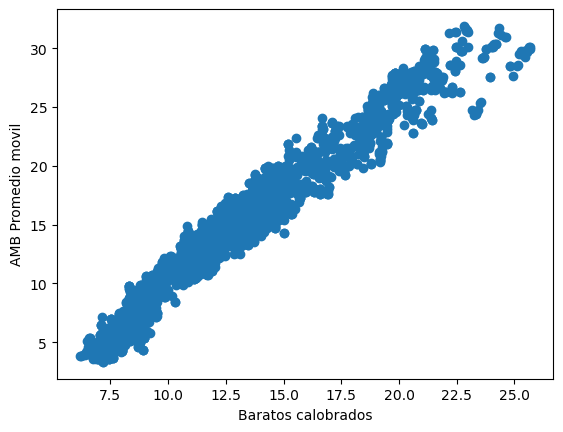

El error cuadraticomedio de los calibrados con AMB es de:  25.23061809391215
Distancia de los calibrados con AMB es de:  183.36396136049973


In [173]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_46'].values
X = DataAMB_CORREGIDO['moving average_46'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf46=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf46.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf46.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_46'], rf46.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred46'] = rf46.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf46.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_46','pred46'))

# Prediccion y calibracion de las medidas para ventana = 60

Mean Absolute Error: 1.5284883130751323
Accuracy: 87.69617306779655
RMSE: 1.9988578875734633


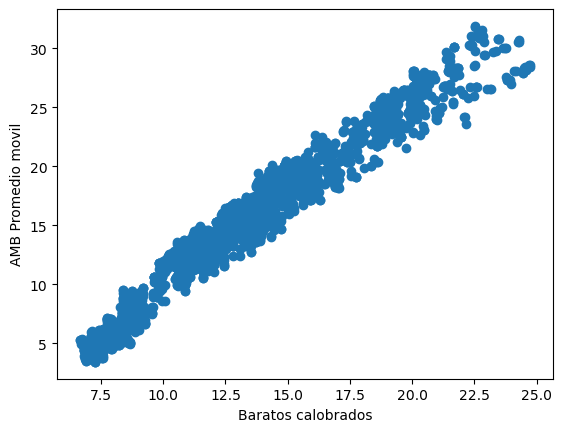

El error cuadraticomedio de los calibrados con AMB es de:  26.33098771830716
Distancia de los calibrados con AMB es de:  182.17635768797356


In [172]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_60'].values
X = DataAMB_CORREGIDO['moving average_60'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf60=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf60.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf60.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_60'], rf60.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred60'] = rf60.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf60.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_60','pred60'))

# Prediccion y calibracion de las medidas para ventana = 80

Mean Absolute Error: 1.4398292065074545
Accuracy: 88.98858294622931
RMSE: 1.8948591362196265


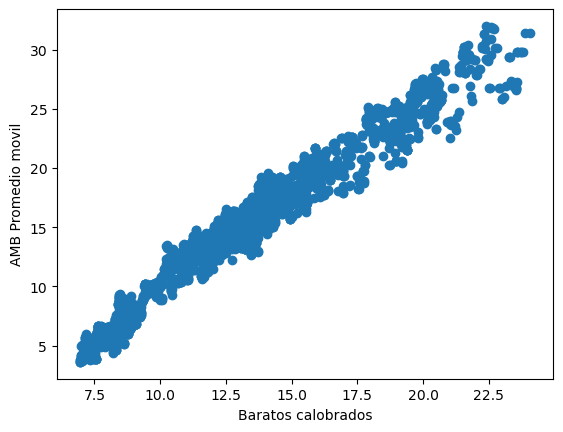

El error cuadraticomedio de los calibrados con AMB es de:  27.536789976682417
Distancia de los calibrados con AMB es de:  179.73608753049845


In [171]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_80'].values
X = DataAMB_CORREGIDO['moving average_80'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf80=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf80.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf80.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_80'], rf80.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred80'] = rf80.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf80.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_80','pred80'))

# Prediccion y calibracion de las medidas para ventana = 100

Mean Absolute Error: 1.2822745050263347
Accuracy: 90.3705142504678
RMSE: 1.722120716009456


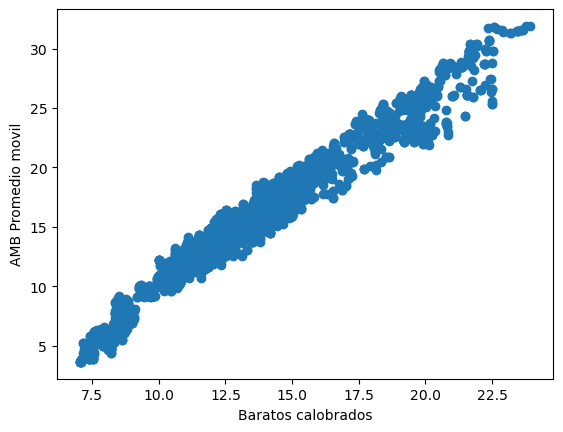

El error cuadraticomedio de los calibrados con AMB es de:  28.691638068990684
Distancia de los calibrados con AMB es de:  178.39343674055442


In [170]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_100'].values
X = DataAMB_CORREGIDO['moving average_100'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf100=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf100.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf100.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_100'], rf100.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred100'] = rf100.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf100.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_100','pred100'))

# Prediccion y calibracion de las medidas para ventana = 120

Mean Absolute Error: 1.2576739229232092
Accuracy: 90.78938867532457
RMSE: 1.680569372950195


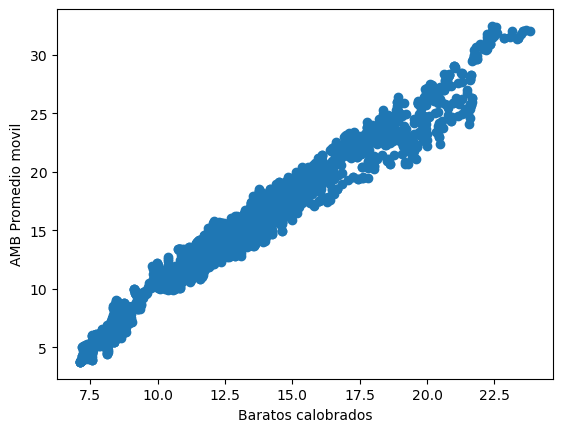

El error cuadraticomedio de los calibrados con AMB es de:  29.619455720648435
Distancia de los calibrados con AMB es de:  174.79825910277492


In [165]:
#Funcion de calibracion
data_copy = data.copy()
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 23:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_120'].values
X = DataAMB_CORREGIDO['moving average_120'].values.reshape(-1, 1)


train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf120=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="squared_error")
# Train the model on training data
rf120.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf120.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)


plt.scatter(DataAMB_CORREGIDO['moving average_120'], rf120.predict(X))
plt.xlabel('Baratos calobrados')
plt.ylabel('AMB Promedio movil')
plt.show()
DataAMB_CORREGIDO['pred120'] = rf120.predict(X)
ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf120.predict(X))**2).mean()))
print('El error cuadraticomedio de los calibrados con AMB es de: ',ErrorCuadraticoMedio)
print('Distancia de los calibrados con AMB es de: ',distancia_euclidiana_c('moving average_120','pred120'))

In [169]:
#Distancia de las medidas


ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf3.predict(X))**2).mean()))

distancia_AMB_BARATAS = mt.sqrt((((DataAMB_CORREGIDO['Medidas'] - DataAMB_CORREGIDO['Baratas'])**2)).sum())

distancias_ventanas_moviles =  mt.sqrt((((DataAMB_CORREGIDO['moving average_3'] - data1['moving average_3'])**2)).sum())

Distancia_AMB_con_Barata_Calibrados = mt.sqrt((((DataAMB_CORREGIDO['moving average_24'] - rf24.predict(X))**2)).sum())

Distancia_AMB_con_Barata_Calibrados

217.19654842058767

In [168]:
distancia_AMB_BARATAS

638.1119685289557

In [167]:
ErrorCuadraticoMedio

29.619455720648435

In [166]:
distancias_ventanas_moviles

581.0979499801335

## Graficas comprando los datos sin calibrar con los calobrados y su error

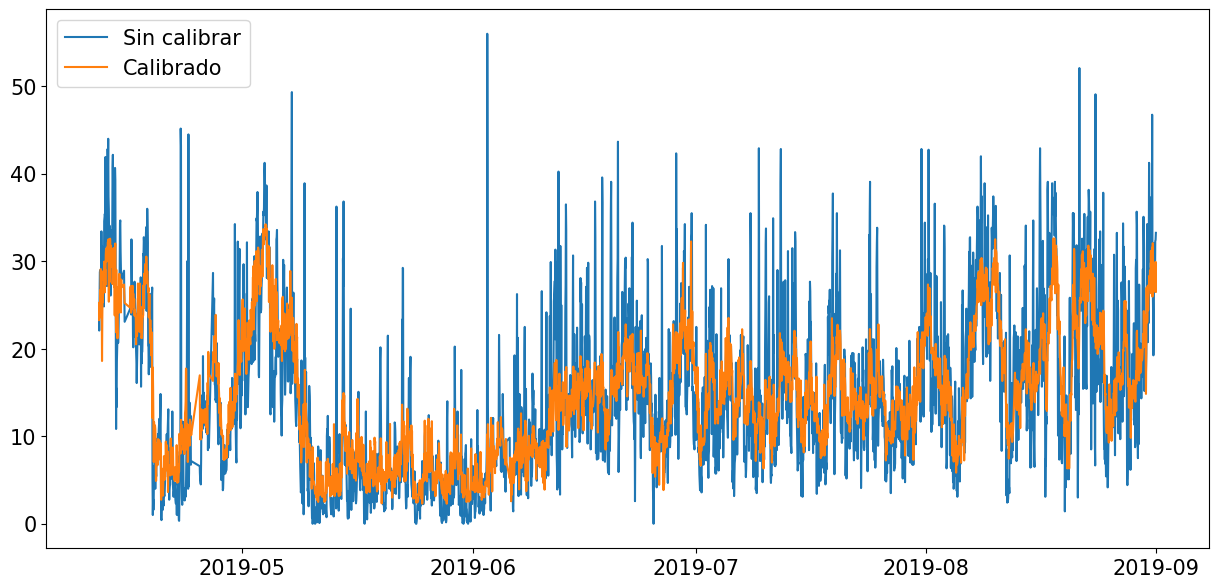

In [87]:
plt.figure(figsize=(15,7))
plt.plot(data1['fecha_hora_med'], data1['valor'], label='Sin calibrar')
plt.plot(data1['fecha_hora_med'],rf16.predict(X), label='Calibrado')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

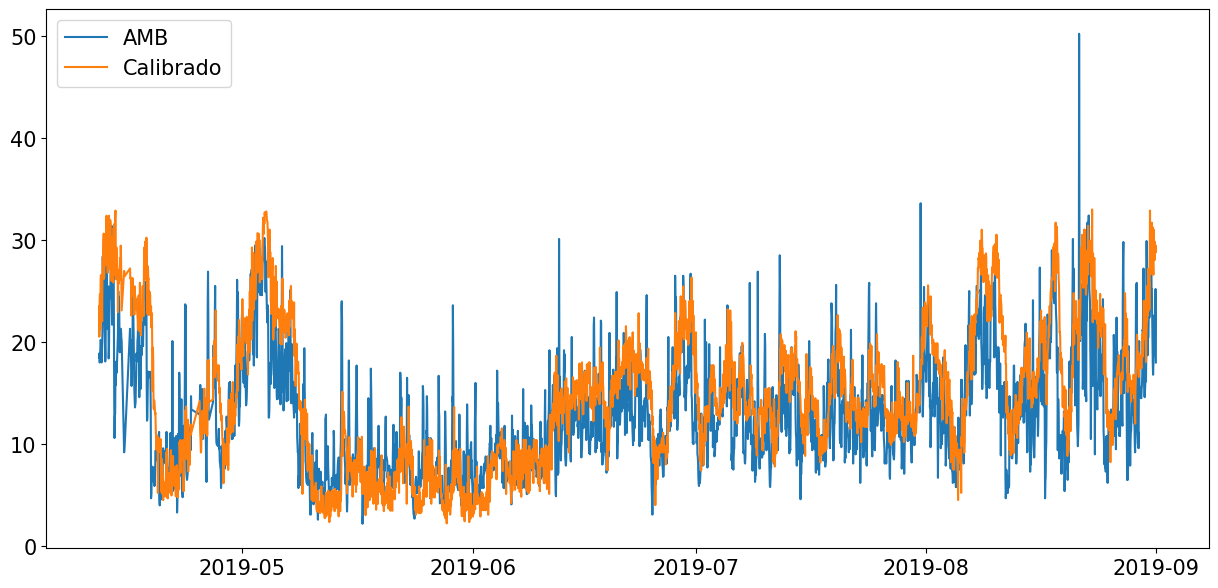

In [96]:
plt.figure(figsize=(15,7))
plt.plot(DataAMB_CORREGIDO['Fechas'], DataAMB_CORREGIDO['Medidas'], label='AMB')
plt.plot(DataAMB_CORREGIDO['Fechas'], rf24.predict(X), label='Calibrado')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
